In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
inf=np.inf
pi=np.pi

In [18]:
class system_continuous:
    def __init__(self, H, h1, h2, As, d=inf):
        self.H=H
        self.h1=h1
        self.h2=h2
        self.As=As
        self.l=1
        self.d=d
        self.xh=self.h1*np.max(self.As)/(self.h1-self.h2)
        self.x_step=0.02
        
    def calc_Ll(self):
        self.Ll=self.x*(self.h1-self.H)/self.h1
    
    def calc_Lh(self):
        self.Lh=self.a+(self.a-self.x)*(self.H-self.h2)/self.h2
    
    def light_exist(self, y):
        if np.abs(y)<self.d:
            return self.l
        else:
            return 0
    
    def Ly2Gx(self, y):
        return self.light_exist(y)*self.H/(4*pi*pow(self.H**2+pow(self.x-y, 2), 3/2))
    
    def calc_Gx(self):
        self.calc_Ll()
        self.calc_Lh()
        return integrate.quad(self.Ly2Gx, self.Ll, self.Lh)
    
    def calc_shadow(self):
        shadow=[]
        Xs=np.arange(-self.x_step*10, self.xh, self.x_step)
        for x in Xs:
            self.x=x
            shadow.append(self.calc_Gx()[0])
        return shadow
            
    def calc_shadows(self):
        self.shadows=[]
        for a in self.As:
            self.a=a
            self.shadows.append(self.calc_shadow())
            
        self.shadows=np.array(self.shadows)

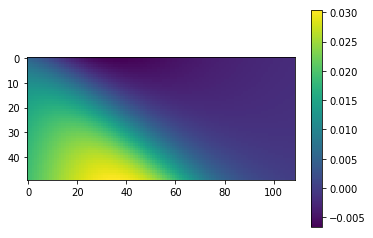

In [19]:
ex1=system_continuous(3, 1, 0.5, np.arange(0.01, 1, 0.02))
ex1.calc_shadows()

plt.imshow(ex1.shadows, interpolation='None')
plt.colorbar()
plt.show()

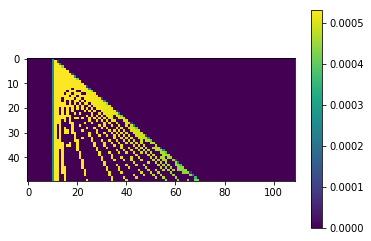

In [20]:
ex2=system_continuous(3, 1, 0.5, np.arange(0.01, 1, 0.02), d=0.03)
ex2.calc_shadows()
plt.imshow(ex2.shadows, interpolation='None')
plt.colorbar()
plt.show()

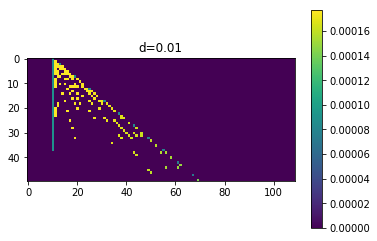

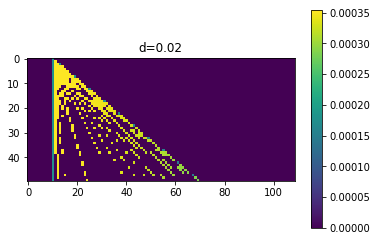

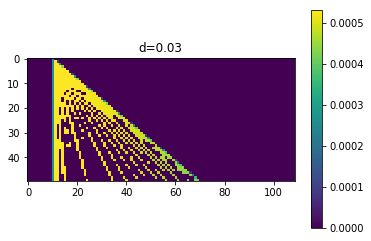

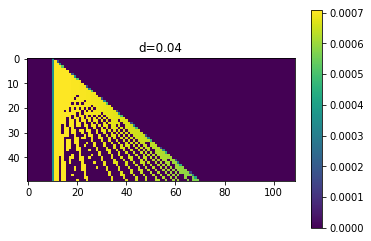

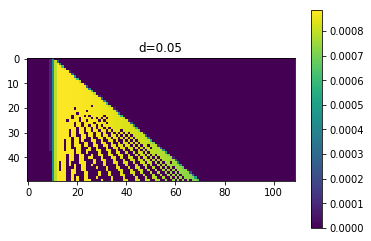

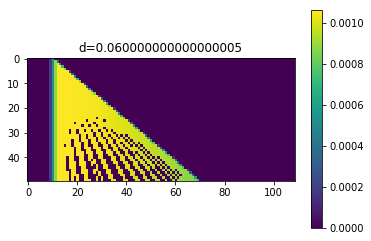

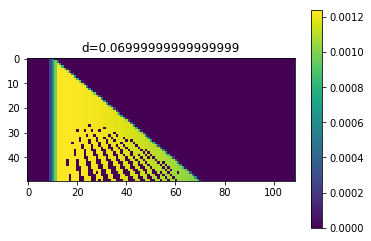

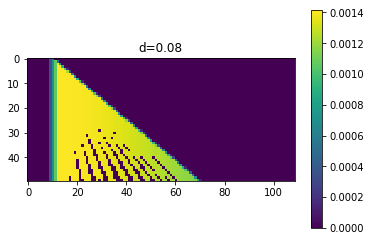

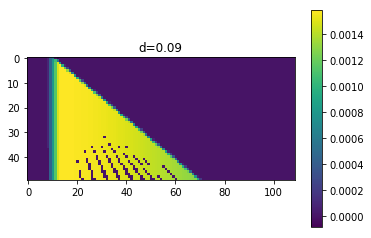

In [21]:
Ds=np.arange(0.01, 0.1, 0.01)
for d in Ds:
    ex=system_continuous(3, 1, 0.5, np.arange(0.01, 1, 0.02), d)
    ex.calc_shadows()
    plt.imshow(ex.shadows, interpolation='None')
    plt.colorbar()
    plt.title('d='+str(d))
    plt.show()

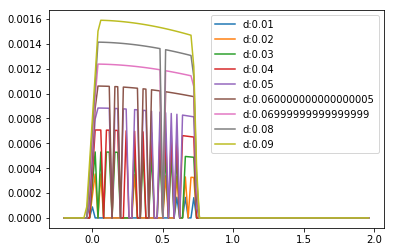

In [22]:
Ds=np.arange(0.01, 0.1, 0.01)
for d in Ds:
    ex=system_continuous(3, 1, 0.5, np.arange(0.01, 1, 0.02), d)
    ex.calc_shadows()
    plt.plot(np.arange(-10*ex.x_step, ex.xh, ex.x_step), ex.shadows[30], label='d:'+str(d))

plt.legend()
plt.show()

In [25]:
class system_discrete:
    def __init__(self, H, h1, h2, As, d=inf):
        self.H=H
        self.h1=h1
        self.h2=h2
        self.As=As
        self.l=1
        self.d=d
        self.xh=self.h1*np.max(self.As)/(self.h1-self.h2)
        self.x_step=0.02
        
    def calc_Ll(self):
        self.Ll=self.x*(self.h1-self.H)/self.h1
    
    def calc_Lh(self):
        self.Lh=self.a+(self.a-self.x)*(self.H-self.h2)/self.h2
    
    def light_exist(self, y):
        if np.abs(y)<self.d:
            return self.l
        else:
            return 0
    
    def Ly2Gx(self, y):
        return self.light_exist(y)*self.H/(4*pi*pow(self.H**2+pow(self.x-y, 2), 3/2))
    
    def Sum_Ly2Gx(self):
        return np.sum([self.Ly2Gx(i) for i in np.arange(np.ceil(self.Ll), np.ceil(self.Lh))])
    
    def calc_Gx(self):
        self.calc_Ll()
        self.calc_Lh()
        return self.Sum_Ly2Gx()
    
    def calc_shadow(self):
        shadow=[]
        Xs=np.arange(-self.x_step*10, self.xh, self.x_step)
        for x in Xs:
            self.x=x
            shadow.append(self.calc_Gx())
        return shadow
            
    def calc_shadows(self):
        self.shadows=[]
        for a in self.As:
            self.a=a
            self.shadows.append(self.calc_shadow())
            
        self.shadows=np.array(self.shadows)

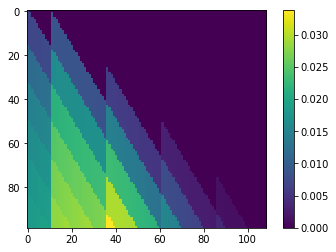

In [30]:
ex1=system_discrete(3, 1, 0.5, np.arange(0.01, 1, 0.01))
ex1.calc_shadows()

plt.imshow(ex1.shadows, interpolation='None')
plt.colorbar()
plt.show()

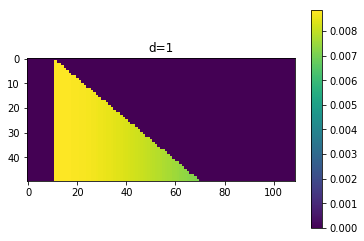

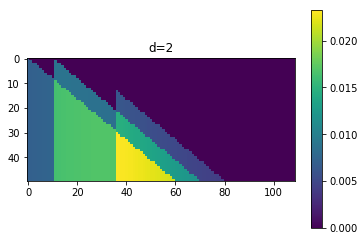

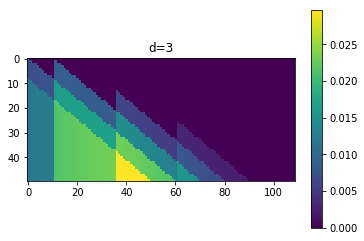

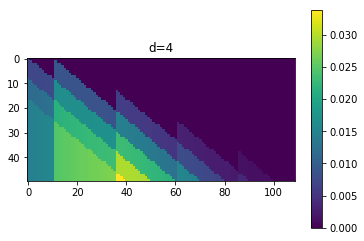

In [33]:
Ds=np.arange(1, 5, 1)
for d in Ds:
    ex=system_discrete(3, 1, 0.5, np.arange(0.01, 1, 0.02), d)
    ex.calc_shadows()
    plt.imshow(ex.shadows, interpolation='None')
    plt.colorbar()
    plt.title('d='+str(d))
    plt.show()